In [11]:
import os
import time
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import PIL

import torch
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
from torchvision.models import resnet50

import medmnist
from medmnist import INFO, Evaluator

In [19]:
data_flag = 'organsmnist'
data_info = INFO[data_flag]
DataClass = getattr(medmnist, data_info['python_class'])

data_transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize(mean=[.5], std=[.5])
])

train_dataset = DataClass(split='train', transform=data_transform, download=False)
test_dataset = DataClass(split='test', transform=data_transform, download=False)

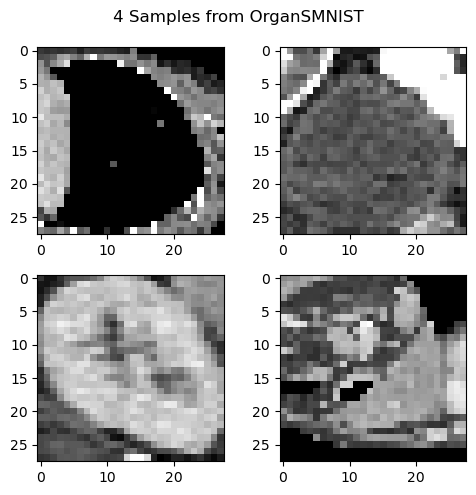

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(5, 5))
for j in range(len(train_dataset.imgs[:4])):
    plt.subplot(220 + 1 + j)
    plt.imshow(train_dataset.imgs[j], cmap='gray')
fig.suptitle('4 Samples from OrganSMNIST')
plt.tight_layout();

In [23]:
# This was on: https://github.com/MedMNIST/MedMNIST/blob/main/examples/getting_started.ipynb
# It did not run on my machine.
# train_dataset.montage(length=20)

In [7]:
num_epochs = 10
batch_size = 64
learning_rate = 0.001

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

model = resnet50()

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# https://moiseevigor.github.io/software/2022/12/18/one-pager-training-resnet-on-imagenet/
# Train the model...
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # # Move input and label tensors to the device
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero out the optimizer
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

    # Print the loss for every epoch
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

print(f'Finished Training, Loss: {loss.item():.4f}')

ValueError: too many values to unpack (expected 2)